**TCS Stock Price Analysis and Prediction**

        Date       Open       High        Low      Close  Volume  Dividends  \
0 2002-08-12  28.794172  29.742206  28.794172  29.519140  212976        0.0   
1 2002-08-13  29.556316  30.030333  28.905705  29.119476  153576        0.0   
2 2002-08-14  29.184536  29.184536  26.563503  27.111877  822776        0.0   
3 2002-08-15  27.111877  27.111877  27.111877  27.111877       0        0.0   
4 2002-08-16  26.972458  28.255089  26.582090  27.046812  811856        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4463 non-null   datetime64[ns]
 1   Open          4463 non-null   float64   

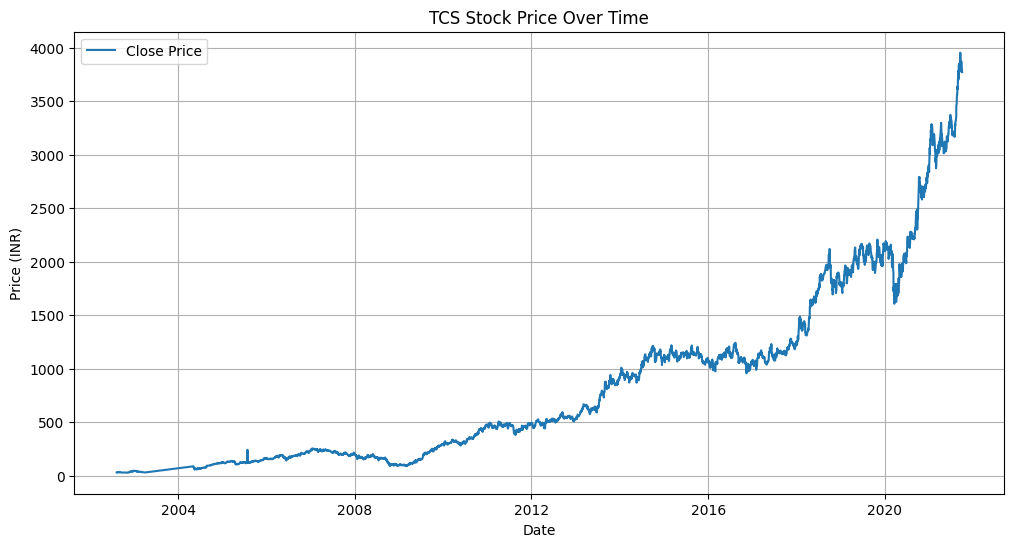

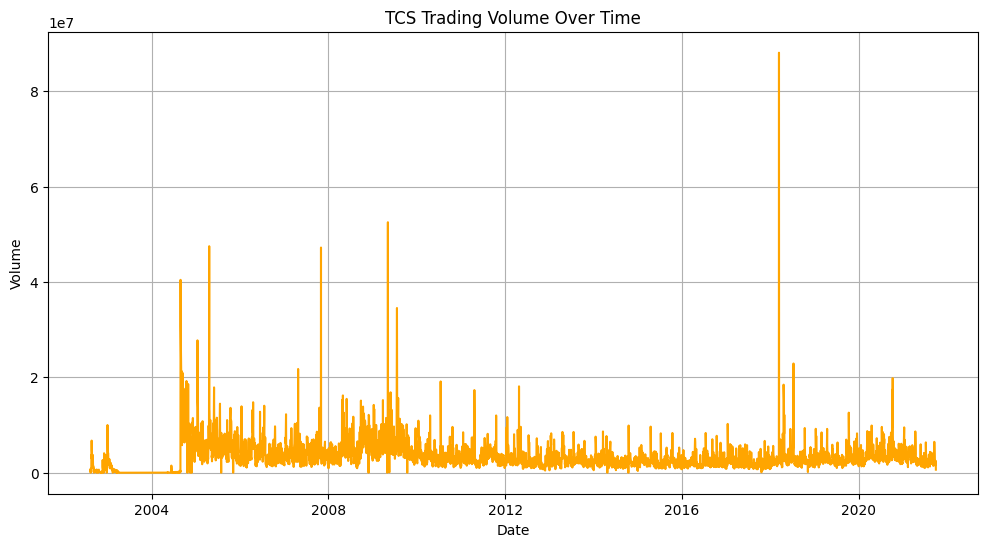

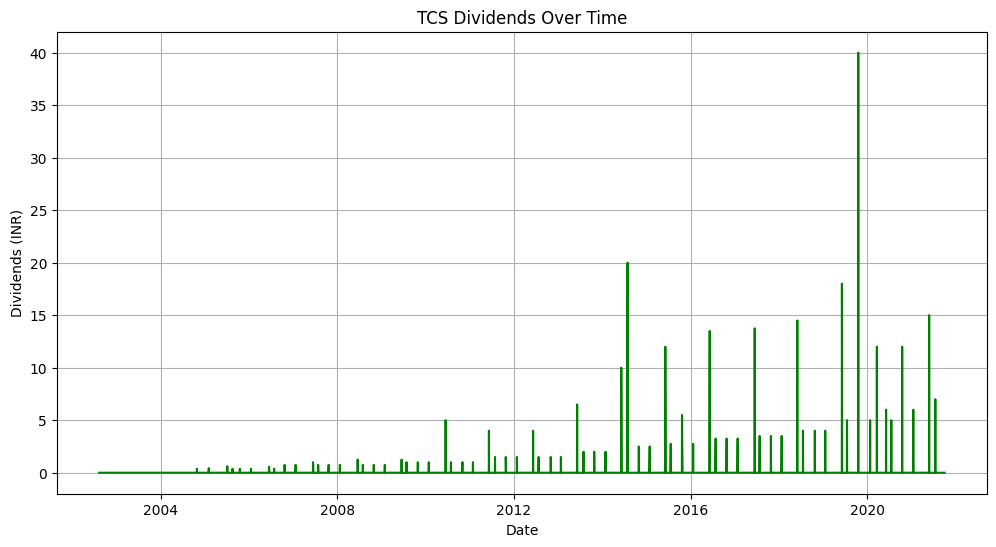

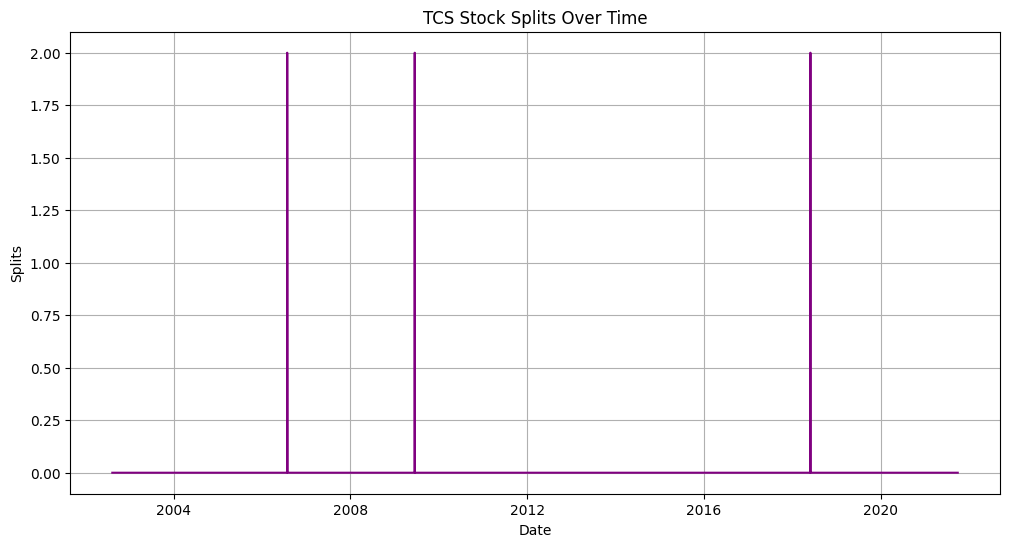

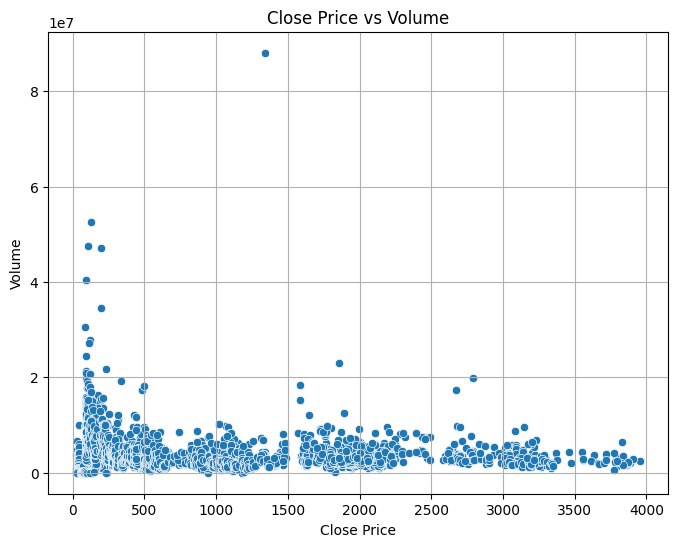

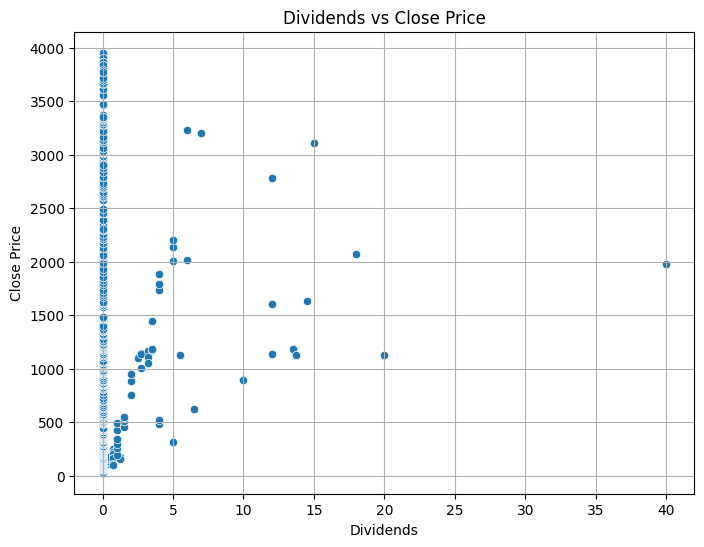

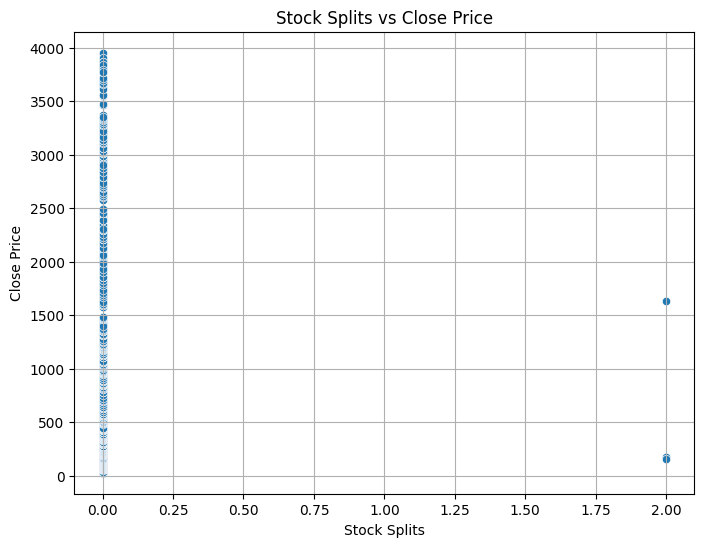

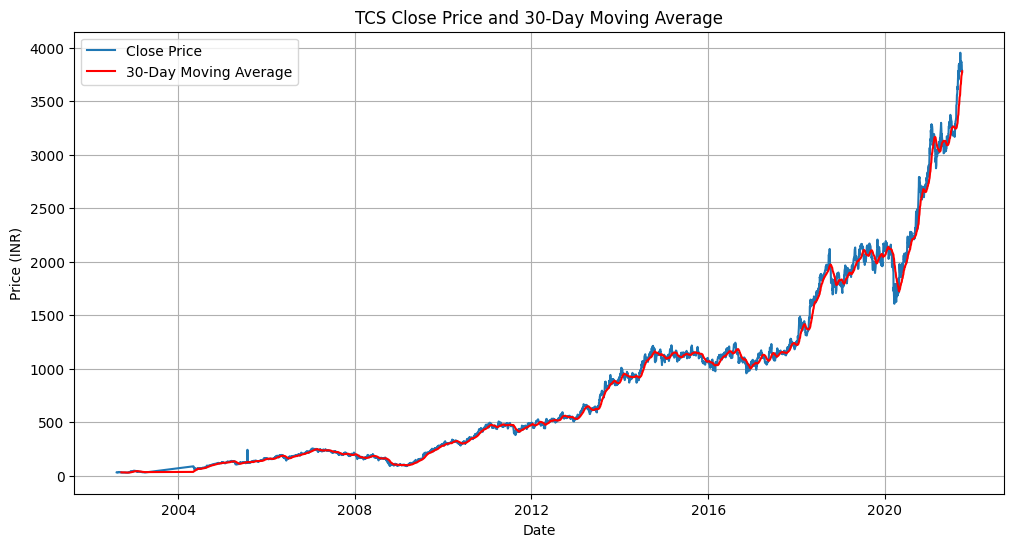

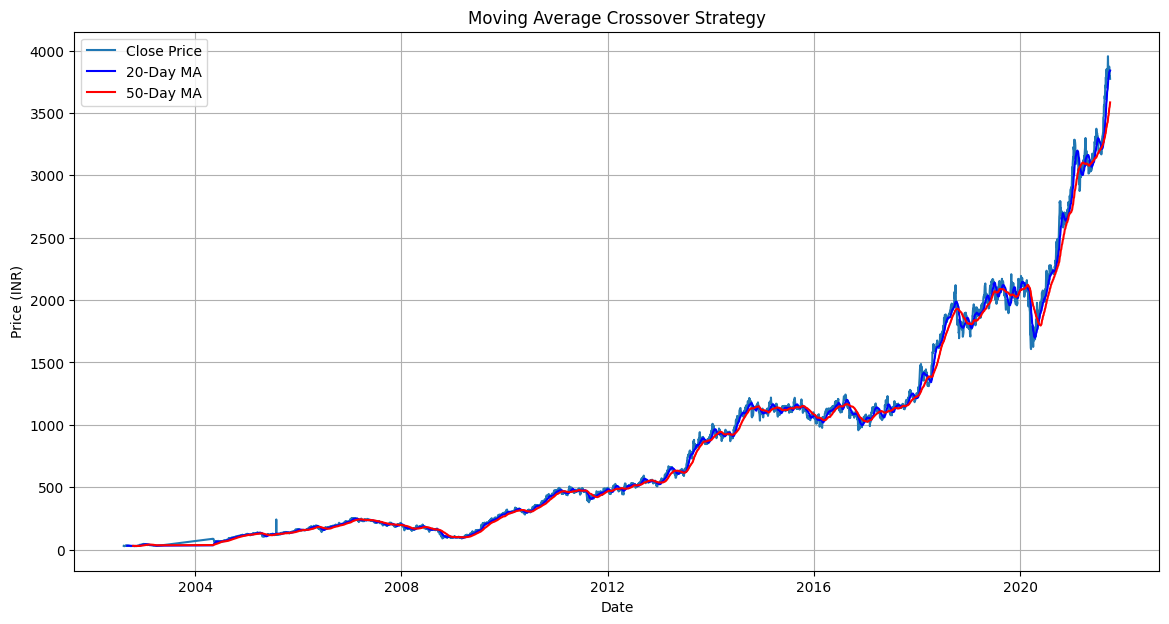

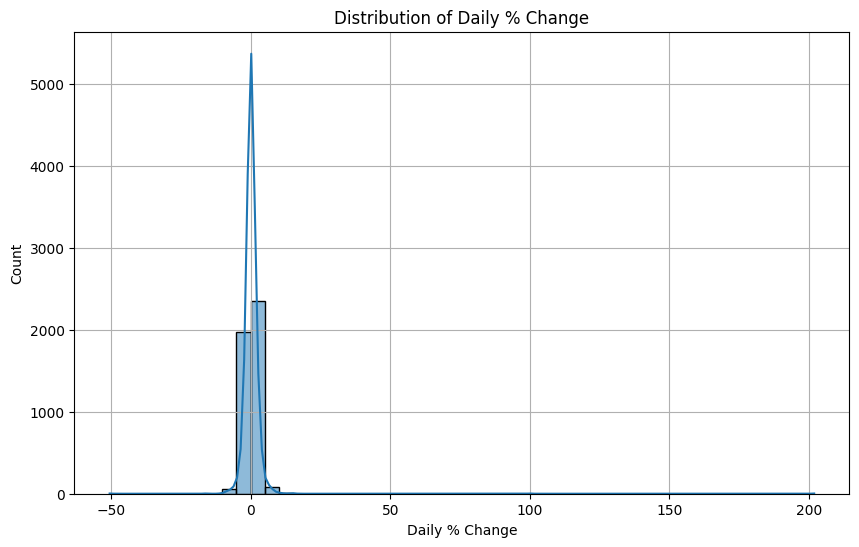

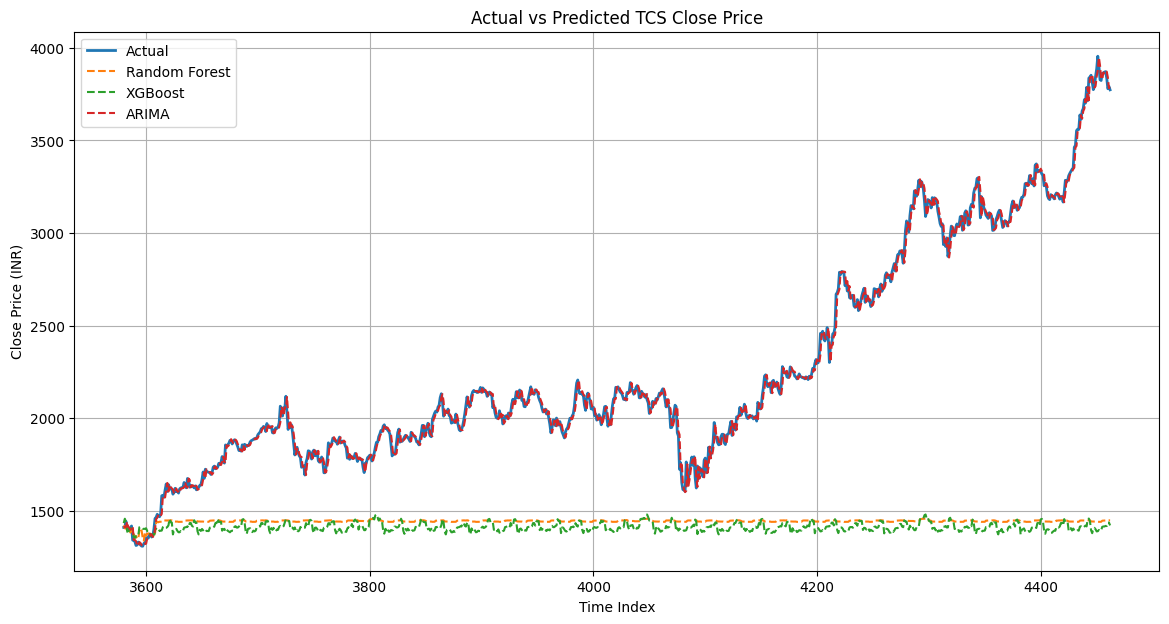

In [ ]:
# Install if needed
# !pip install pandas matplotlib seaborn scikit-learn xgboost statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('/content/TCS_stock_history.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)

# Basic columns assumed: 'Date', 'Close', 'Volume', 'Dividends', 'Stock Splits'
print(df.head())
print(df.columns)
print(df.info())
print(df.describe())

# -----------------------------------
# 1. TCS Stock Price Over Time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('TCS Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Volume Over Time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volume'], color='orange')
plt.title('TCS Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# 3. Dividends Over Time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Dividends'], color='green')
plt.title('TCS Dividends Over Time')
plt.xlabel('Date')
plt.ylabel('Dividends (INR)')
plt.grid(True)
plt.show()

# 4. Stock Splits Over Time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Stock Splits'], color='purple')
plt.title('TCS Stock Splits Over Time')
plt.xlabel('Date')
plt.ylabel('Splits')
plt.grid(True)
plt.show()

# 5. Close Price vs Volume
plt.figure(figsize=(8,6))
sns.scatterplot(x='Close', y='Volume', data=df)
plt.title('Close Price vs Volume')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# 6. Dividends vs Close Price
plt.figure(figsize=(8,6))
sns.scatterplot(x='Dividends', y='Close', data=df)
plt.title('Dividends vs Close Price')
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# 7. Stock Splits vs Close Price
plt.figure(figsize=(8,6))
sns.scatterplot(x='Stock Splits', y='Close', data=df)
plt.title('Stock Splits vs Close Price')
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# 8. Close Price and 30-day Moving Average
df['MA30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA30'], label='30-Day Moving Average', color='red')
plt.title('TCS Close Price and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

# 9. Moving Average Crossover Strategy (20MA vs 50MA)
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA20'], label='20-Day MA', color='blue')
plt.plot(df['Date'], df['MA50'], label='50-Day MA', color='red')
plt.title('Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

# 10. Distribution of Daily Percentage Change
df['Daily Return'] = df['Close'].pct_change() * 100

plt.figure(figsize=(10,6))
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily % Change')
plt.xlabel('Daily % Change')
plt.grid(True)
plt.show()

# -----------------------------------
# 11. Actual vs Predicted Close Price

# Feature Engineering
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)
df['Close_Lag3'] = df['Close'].shift(3)
df.dropna(inplace=True)

X = df[['Close_Lag1', 'Close_Lag2', 'Close_Lag3', 'Day', 'Month', 'Year']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# XGBoost
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)
xgb_preds = xgbr.predict(X_test)

# ARIMA
ts = df.set_index('Date')['Close']
arima_model = ARIMA(ts, order=(5,1,0))
arima_fit = arima_model.fit()
arima_preds = arima_fit.predict(start=len(ts)-len(y_test), end=len(ts)-1, typ='levels')

# Plot Actual vs Predicted
plt.figure(figsize=(14,7))
plt.plot(y_test.index, y_test.values, label='Actual', linewidth=2)
plt.plot(y_test.index, rf_preds, label='Random Forest', linestyle='dashed')
plt.plot(y_test.index, xgb_preds, label='XGBoost', linestyle='dashed')
plt.plot(y_test.index, arima_preds, label='ARIMA', linestyle='dashed')
plt.title('Actual vs Predicted TCS Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.grid(True)
plt.show()
